In [23]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] ='serif'
rcParams['font.size'] = 16

In [47]:
ms =50.
g =9.81
rho = 1.091
ve = 325.
CD = 0.15
mp0 = 100.0
r = 0.5

In [48]:
A = math.pi*r**2

In [49]:
A

0.7853981633974483

In [86]:
def f(u):
    h = u[0]
    v = u[1]
    return numpy.array([v,
                       -g+ve*mpdot(n*dt)/(ms+mp[n])-0.5*rho*v*numpy.abs(v)*CD*A/(ms+mp[n])])

In [110]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [198]:
T = 100
dt = 0.1
N = int(T/dt) + 1
t = numpy.linspace(0., T, N)

u = numpy.empty([N, 2])

In [199]:
u

array([[  6.93614259e-310,   6.93614259e-310],
       [  1.38379250e-316,   1.38379250e-316],
       [  4.94065646e-324,   1.38381305e-316],
       ..., 
       [  1.06195820e+006,   6.93613778e-310],
       [  6.93614030e-310,   6.56164885e-302],
       [              nan,   0.00000000e+000]])

In [200]:
u = numpy.zeros([N, 2])

In [201]:
u

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       ..., 
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [202]:
h0 = 0
v0 = 0
u[0] = numpy.array([h0,v0])

In [203]:
def mpdot(t):
    if t < 5.0:
        return 20.0
    else:
        return 0.

In [249]:
mp = numpy.empty(N)
for n in range (N):
    if n < 5/dt:
        mp[n] = mp0 - mpdot(n*dt)*n*dt
    else:
        mp[n]=0

In [250]:
print (mp[int(3.2/dt)])

36.0


In [251]:
for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)

In [252]:
h = u[:,0]
v = u[:,1]

In [253]:
u[int(5/dt),1]

232.10613341261791

In [254]:
u[int(5/dt),0]

523.52283429184763

In [255]:
for n in range(N):
    if u[n,1] < 0:
        print ('h = {:.2f} '.format(u[n, 0]),'t={}s'. format(n*dt))
        break
    

h = 1334.18  t=15.700000000000001s


In [256]:
for n in range (1,N):
    if u[n,0] < 0:
        print ('t = {} s'.format(n*dt), 'v={:.2f} m/s'. format(u[n,1]))

t = 37.1 s v=-86.01 m/s
t = 37.2 s v=-86.04 m/s
t = 37.300000000000004 s v=-86.07 m/s
t = 37.4 s v=-86.10 m/s
t = 37.5 s v=-86.12 m/s
t = 37.6 s v=-86.15 m/s
t = 37.7 s v=-86.18 m/s
t = 37.800000000000004 s v=-86.20 m/s
t = 37.9 s v=-86.23 m/s
t = 38.0 s v=-86.26 m/s
t = 38.1 s v=-86.28 m/s
t = 38.2 s v=-86.30 m/s
t = 38.300000000000004 s v=-86.33 m/s
t = 38.400000000000006 s v=-86.35 m/s
t = 38.5 s v=-86.37 m/s
t = 38.6 s v=-86.40 m/s
t = 38.7 s v=-86.42 m/s
t = 38.800000000000004 s v=-86.44 m/s
t = 38.900000000000006 s v=-86.46 m/s
t = 39.0 s v=-86.48 m/s
t = 39.1 s v=-86.50 m/s
t = 39.2 s v=-86.52 m/s
t = 39.300000000000004 s v=-86.54 m/s
t = 39.400000000000006 s v=-86.56 m/s
t = 39.5 s v=-86.57 m/s
t = 39.6 s v=-86.59 m/s
t = 39.7 s v=-86.61 m/s
t = 39.800000000000004 s v=-86.63 m/s
t = 39.900000000000006 s v=-86.64 m/s
t = 40.0 s v=-86.66 m/s
t = 40.1 s v=-86.67 m/s
t = 40.2 s v=-86.69 m/s
t = 40.300000000000004 s v=-86.71 m/s
t = 40.400000000000006 s v=-86.72 m/s
t = 40.5 s v=-86

In [257]:
max(h)

1334.1829454303067

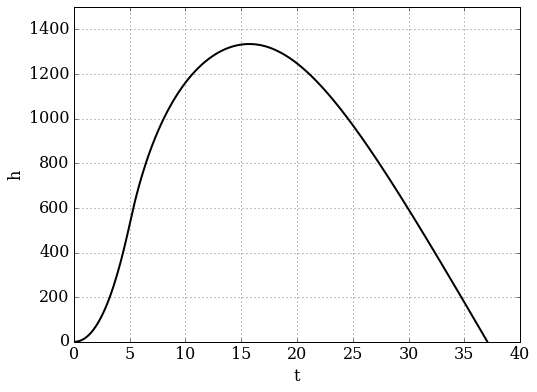

In [258]:
pyplot.figure(figsize = (8,6))
pyplot.grid(True)
pyplot.ylim(0,1500)
pyplot.xlim(0,40)
pyplot.xlabel(r't')
pyplot.ylabel(r'h')
pyplot.plot(t,h,'k-',lw=2)

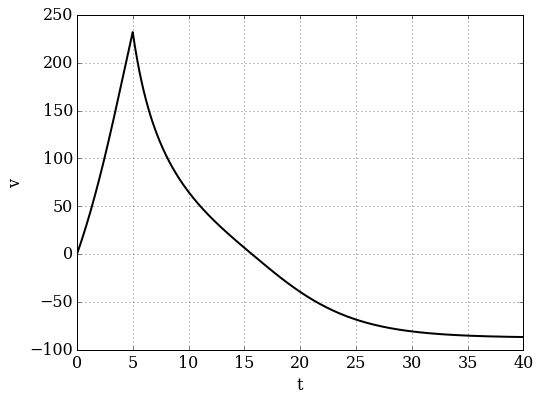

In [259]:
pyplot.figure(figsize = (8,6))
pyplot.grid(True)
pyplot.xlim(0,40)
pyplot.xlabel(r't')
pyplot.ylabel(r'v')
pyplot.plot(t,v,'k-',lw=2)

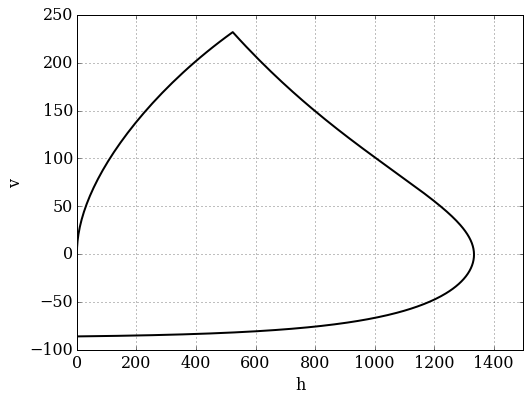

In [260]:
pyplot.figure(figsize = (8,6))
pyplot.grid(True)
pyplot.xlim(0,1500)
pyplot.xlabel(r'h')
pyplot.ylabel(r'v')
pyplot.plot(h,v,'k-',lw=2)